In [4]:
import sys, os
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

In [5]:
import pdb
from rnn import RNN
from rnn2deep import RNN2
from rntn import RNTN
import tree as treeM
import numpy as np
import collections

In [6]:
#pdb.set_trace()
train = treeM.loadTrees()
numW = len(treeM.loadWordMap())
#print numW
#print len(train)

wvecDim = 10
middleDim = 6
outputDim = 5

#rnn = RNN2(wvecDim,middleDim,outputDim,numW,mbSize=4)
#rnn = RNN(wvecDim,outputDim,numW,mbSize=4)
#rnn.initParams()


Loading training trees..


In [7]:
#rnn = RNN2(wvecDim,middleDim,outputDim,numW,mbSize=4)
#rnn = RNN(wvecDim,outputDim,numW,mbSize=4)
rnn = RNTN(wvecDim,outputDim,numW,mbSize=1)
rnn.initParams()

In [8]:
mbData = train[:1]
#print mbData[0].root
#pdb.set_trace()
print "Numerical gradient check..."
rnn.check_grad(mbData)

Numerical gradient check...
Checking dW... (might take a while)
Grad Check Passed for dW
Checking dL...
Grad Check Passed for dL


[[14  6]
 [ 0  0]]


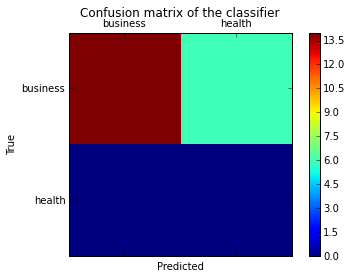

In [50]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import pylab as plt
y_test=['business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business']

pred=array(['health', 'business', 'business', 'business', 'business',
       'business', 'health', 'health', 'business', 'business', 'business',
       'business', 'business', 'business', 'business', 'business',
       'health', 'health', 'business', 'health'], 
      dtype='|S8')

labels = ['business', 'health']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
import numpy as np

In [53]:
range(0,5)

[0, 1, 2, 3, 4]

In [2]:
a = range(5)
a

[0, 1, 2, 3, 4]

In [15]:
b = a[...,None]
b

TypeError: list indices must be integers, not tuple

In [25]:
import numpy as np
a = [ 1, 2, 3, 4, 5, 6 ]
x = a [ 1 : 5 ]             
a [ 1 : 3 ] = [10, 11, 12 ]                 
del a [ 1 : 4 ]                             
a
m = np.arange(200).reshape(20,10)
m

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169

In [40]:
a = m [ 0 : 100 : 10 ]  
b = m [ 1 : 10, 3 : 20 ]
c = m [ 0 : 100 : 10, 50 : 75 : 5 ] 

d = np.arange(10)
e = d.T

In [43]:
f = np.outer(d,e)
f.shape

(10, 10)

In [44]:
g = np.random.randn(2,4,4)
f = np.random.randn(4,)

In [57]:
a = g.dot(f).dot(f.T)
b = np.zeros_like(a)
for i in xrange(2):
    b[i] = f.dot(g[i,:,:].dot(f))
c = np.outer(f,f.T)
a == b
print c
print a
print b

[[ 3.12252055  0.11328885 -3.3159294   2.20889926]
 [ 0.11328885  0.00411026 -0.12030596  0.08014156]
 [-3.3159294  -0.12030596  3.52131799 -2.34571843]
 [ 2.20889926  0.08014156 -2.34571843  1.5625953 ]]
[ 4.78557371 -0.56505303]
[ 4.78557371 -0.56505303]


In [2]:
from rntn import RNTN

In [ ]:
epochs=50
step=1e-2
wvecDim=30

# for RNN2 only, otherwise doesnt matter
outfile="models/${model}_wvecDim_${wvecDim}_step_${step}_2.bin"
model="RNTN" #either RNN, RNN2, RNN3, RNTN, or DCNN
%run runNNet.py --step $step --epochs $epochs --outFile $outfile \
                --middleDim $middleDim --outputDim 5 --wvecDim $wvecDim --model $model

Loading data...
Loading training trees..
initializing SGD
Using adagrad...
Loading deving trees..
Running epoch 0
running SGD
Iter 1 : Cost=60.1926, ExpCost=60.1926.
Iter 2 : Cost=60.8315, ExpCost=60.1990.
Iter 3 : Cost=57.2371, ExpCost=60.1694.
Iter 4 : Cost=55.3064, ExpCost=60.1208.
Iter 5 : Cost=52.1063, ExpCost=60.0406.
Iter 6 : Cost=57.4276, ExpCost=60.0145.
Iter 7 : Cost=55.2765, ExpCost=59.9671.
Iter 8 : Cost=50.8777, ExpCost=59.8762.
Iter 9 : Cost=59.1719, ExpCost=59.8692.
Iter 10 : Cost=63.4552, ExpCost=59.9050.
Iter 11 : Cost=53.2688, ExpCost=59.8387.
Iter 12 : Cost=56.5662, ExpCost=59.8060.
Iter 13 : Cost=54.1342, ExpCost=59.7492.
Iter 14 : Cost=53.9642, ExpCost=59.6914.
Iter 15 : Cost=46.1033, ExpCost=59.5555.
Iter 16 : Cost=52.2022, ExpCost=59.4820.
Iter 17 : Cost=56.4820, ExpCost=59.4520.
Iter 18 : Cost=54.7199, ExpCost=59.4047.
Iter 19 : Cost=53.5859, ExpCost=59.3465.
Iter 20 : Cost=50.9791, ExpCost=59.2628.
Iter 21 : Cost=48.3101, ExpCost=59.1533.
Iter 22 : Cost=47.5440

In [10]:
%debug

> /Users/weiyang/Project/NLPStanford/starter_code/rntn.py(131)softmax()
    130         x = x - np.max(x)
--> 131         return np.exp(x) / sum(np.exp(x))
    132 

ipdb> p x
array([ -707.75334506,     0.        , -2764.87945728,   -14.12304103,
        -592.00774448])
ipdb> quit


AttributeError: 'NoneType' object has no attribute 'set_completer_delims'